#3D Simulation with Butterfly Effect

Examining the Lorenz Attractor equations and generating simulations in 3D matplotlib.

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
sns.set() # uncomment to not use the seaborn aesthetic configuration
import matplotlib as mpl

Building a Vector Field Plotter in 3D

In [2]:
def vector_field3D(dx,dy,dz,xmin,xmax,ymin,ymax,zmin,zmax,numVectors=100,color="gray",length=0.1):
  x,y,z = np.meshgrid(np.linspace(xmin,xmax,int(np.cbrt(numVectors)+1)),
                    np.linspace(ymin,ymax,int(np.cbrt(numVectors)+1)),
                    np.linspace(zmin,zmax,int(np.cbrt(numVectors)+1)))
  u = dx(x,y,x)
  v = dy(x,y,z)
  w = dz(x,y,z)
  plt.quiver(x,y,z,u,v,w,color=color,length=length,normalize=True)

Lorenz Attractor Equations and Creating a 3D Vector Field

$$x' = \sigma(y-x)$$

$$y' = x(\rho-z)-y$$

$$z' = xy-\beta z$$

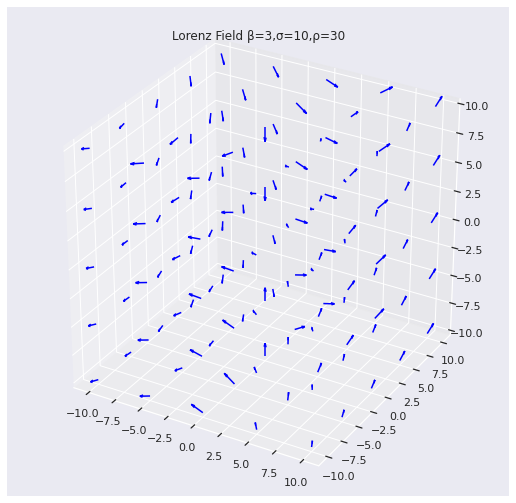

In [3]:
beta = 3; rho = 30; sigma = 10

def dx(x,y,z):
  return(sigma*(y-x))
def dy(x,y,z):
  return(x*(rho-z)-y)
def dz(x,y,z):
  return(x*y-beta*z)

#creating the vector field
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
vector_field3D(dx,dy,dz,-10,10,-10,10,-10,10,numVectors=100,color="blue",length=1.2)
plt.title("Lorenz Field β={},σ={},ρ={}".format(beta,sigma,rho))
plt.show()

Simulator for Lorenz Trajectories Using a 3D Recursive Generalization of Euler's Method, namely

$$\Delta x_{t+\epsilon} \approx x_{t} + \epsilon*x'(x_{t},y_{t},z_{t},t)$$

$$ \Delta y_{t+\epsilon} \approx y_{t} + \epsilon*y'(x_{t},y_{t},z_{t},t) $$

$$\Delta z_{t+\epsilon} \approx z_{t} + \epsilon*z'(x_{t},y_{t},z_{t},t)$$

In [4]:
#if forward = True, it starts from (x0,y0,z0) and traces out the trajectory as t increases
#if forward = False, it starts from (x0,y0,z0) and traces out the trajectory as t decreases

def plotter3D(bounds,dx,dy,dz,x0=0,y0=0,z0=0,points=10000,color="green",linewidth=2,step_size=0.005,forward=True,label=None):
  #craft bounds and plot the initial value as a dot
  [xmin,xmax,ymin,ymax,zmin,zmax] = bounds
  epsilon = 0.1
  ax.scatter(xs=[x0],ys=[y0],zs=[z0],color="white",edgecolor="black",s=100)

  #determine whether to progress forward or backward in time
  b = -1
  if (forward):
    b = 1
  
  #create the arrays to store simulated (x,y) and perform recursive Euler simulation
  x_BUFFER = [x0]
  y_BUFFER = [y0]
  z_BUFFER = [z0]
  for i in range(points):
    x = x_BUFFER[len(x_BUFFER)-1]
    y = y_BUFFER[len(y_BUFFER)-1]
    z = z_BUFFER[len(z_BUFFER)-1]

    du = dx(x,y,z)
    dv = dy(x,y,z)
    dw = dz(x,y,z)

    new_x = x_BUFFER[len(x_BUFFER)-1]+b*step_size*du
    new_y = y_BUFFER[len(y_BUFFER)-1]+b*step_size*dv
    new_z = z_BUFFER[len(z_BUFFER)-1]+b*step_size*dw

    if ((new_x < xmin) or (new_x > xmax) or (new_y < ymin) or (new_y > ymax) or (new_z < zmin) or (new_z > zmax)):
      break
    else:
      x_BUFFER.append(new_x)
      y_BUFFER.append(new_y)
      z_BUFFER.append(new_z)

  #plot the graphs
  if (label == None):
    ax.plot3D(x_BUFFER,y_BUFFER,z_BUFFER,color=color,linewidth=linewidth)
  else:
    ax.plot3D(x_BUFFER,y_BUFFER,z_BUFFER,color=color,linewidth=linewidth,label=label)

Plotting a Lorenz Trajectory Using the Simulator

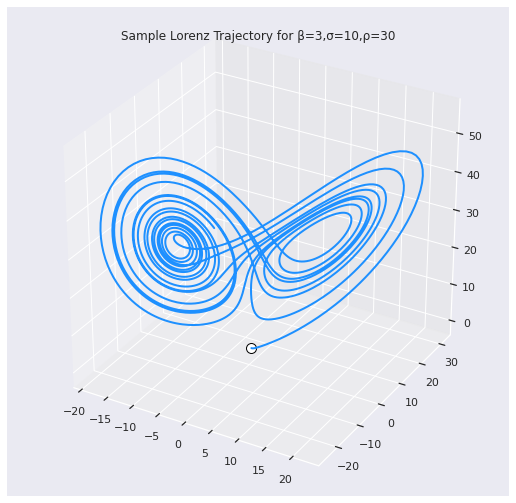

In [5]:
#Lorenz parameters and derivatives
beta = 3; rho = 30; sigma = 10
def dx(x,y,z):
  return(sigma*(y-x))
def dy(x,y,z):
  return(x*(rho-z)-y)
def dz(x,y,z):
  return(x*y-beta*z)

#creating the 3D space
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

bounds = [-100,100,-100,100,-100,100] #barriers for trajectory
plotter3D(bounds,dx,dy,dz,0,1,0,points=3000,color="dodgerblue") #(x0,y0,z0)=(0,1,0)
plt.title("Sample Lorenz Trajectory for β={},σ={},ρ={}".format(beta,sigma,rho))
plt.show()

Plotting Several Trajectories Simultaneously Using a Harness

In [6]:
def simulate_trajectory3D(dx,dy,dz,initial_values,xmin=-10,xmax=10,ymin=-10,ymax=10,zmin=-10,zmax=10,iterations=100000,step_size=0.005,colormap=plt.cm.nipy_spectral,linewidth=1,inversion=True,label=None):
  bounds = [xmin,xmax,ymin,ymax,zmin,zmax]
  for (x0,y0,z0) in initial_values:
    color = colormap(np.random.rand())
    if (label == None):
      plotter3D(bounds,dx,dy,dz,x0,y0,z0,points=iterations,color=color,linewidth=linewidth,step_size=step_size,forward=True,label=None)
    else:
      plotter3D(bounds,dx,dy,dz,x0,y0,z0,points=iterations,color=color,linewidth=linewidth,step_size=step_size,forward=True,label="Trajectory at ($x_0$,$y_0$,$z_0$)=({},{},{})".format(x0,y0,z0))
    if (inversion==True): #includes the backward trajectory from (x0,y0,z0) as well
      plotter3D(bounds,dx,dy,dz,x0,y0,z0,points=iterations,color=color,linewidth=linewidth,step_size=step_size,forward=False,label=None)

Parameters in the Lorenz Attractor. The *inversion* parameter is toggled off so we can only see forward progression from $(x_0,y_0,z_0)$. 

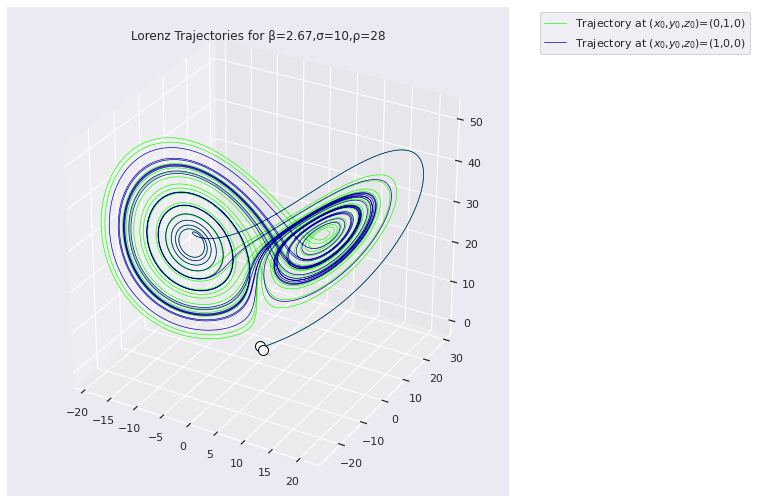

In [8]:
#Lorenz parameters and derivatives
beta = 8/3; rho = 28; sigma = 10

#creating the 3D space
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')

initial_values = [(0,1,0),(1,0,0)]
simulate_trajectory3D(dx,dy,dz,initial_values,xmin=-100,xmax=100,ymin=-100,ymax=100,zmin=-100,zmax=100,iterations=5000,linewidth=0.7,label=True,inversion=False)
plt.title("Lorenz Trajectories for β={},σ={},ρ={}".format(round(beta,2),sigma,rho))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()